# The effect of COVID19 on flight behaviour at Dutch airports

## Course: TIL6022 Python Programming

### Group 7

#### Authors: Charlotte van Rijsoort (5400546), Fleur van Steekelenburg (5313066), Romy Lambregts (4881036), Jasper van den Broek (5262887), Konstantina Mountouri (6074170)

In the past few years, COVID19 took over our lives. It had a huge impact on politics, economics, health and anything else you can come up with. In this assignment, we take a look at this period of time and discuss what the effect of COVID19 was on the flight behaviour at the 5 major Dutch airports. The main focus of the airports is on Schiphol, Rotterdam The Hague Airport, Eindhoven Airport, Maastricht Aachen Airport and Groningen Airport. The type of flights is about passenger, cargo and mail flights.

## Research Objective

Requires data modeling and quantitative research in Transport, Infrastructure & Logistics <br>
Research Question:<br> 
What is the impact of COVID19 on travel patterns for passengers-, cargo- and mail flights from Dutch airports to other EU-countries, non-EU-countries and other regions in the world between 2019 and 2023?


Sub Questions: <br>
Define for passengers / cargo / mail <br>:1. 
What did flight patterns look like before the COVID19 pandemic starte <br>d- ?
Destinati <br>o-  ns
Arriving and departing [spec <br>i2. es]
How did flight patterns change during the COVID19 pand <br>ea. mic?
Destin <br>ab. tions
Arriving and departing [s <br>p3. ecies]
What do flight patterns look like n <br>oa. wadays?
Des <br>tb. inations
Arriving and departing <br> c. [species]
What are the differences compared to pre-pandemi <br>cd.  patterns?
Is COVID19 the only impactor on the flig <br>ht patterns?


To answer these questions several plots are made in python, in this way an overview can be created of the number of flights in relation to the number of COVID-19 infections. To create these plots, two different datasets are used. The first dataset is about the number of flights on five Dutch airports, respectively Schiphol, Rotterdam The Hague, Eindhoven Airport, Maastricht Aachen, and Groningen (3). The second dataset is about the number of COVID-19 infections in the Netherlands.

Data Used: <br>
Data flights: https://opendata.cbs.nl/statline/portal.html?_la=en&_catalog=CBS&tableId=37478eng&_theme=1171 <br>
Data COVID: COVID_19_aantallen_gemeente_cumulatief.csv <br>
Data Pipeline <br>
Github: https://github.com/rlambregts/TIL6022-Group7.git <br>

## Introduction

From 2019 to 2023, the total number of flights across all Dutch airports exhibited fluctuating patterns. In 2019, Dutch airports collectively handled 566,031 flights. However, 2020 witnessed a substantial decline to 258,226 flights, primarily attributed to the disruptive effects of the COVID-19 pandemic. Subsequently, in the years that followed, there was a gradual but notable recovery, with the total flights rebounding to 406,631 in 2023. <br>
Amsterdam Airport Schiphol, as the largest Dutch airport, underwent a similar trajectory. In 2019, it recorded 496,827 flights, but this number dropped to 227,275 in 2020 due to pandemic-related travel restrictions. In the years that ensued, Amsterdam Airport Schiphol also displayed a gradual resurgence, eventually reaching 374,269 flights in 2023 <br>.
The trends observed at Rotterdam The Hague Airport and Eindhoven Airport mirrored the overall pattern, with decreases in 2020 and subsequent recovery in the following years. Maastricht Aachen Airport and Groningen Airport Eelde demonstrated comparable trends, albeit with variations in the magnitude of decline and recover <br>y.
These trends are indicative of the challenges faced by the aviation industry globally in 2020 due to the pandemic, followed by a gradual recovery in the subsequent years as travel restrictions were eased. It's important to note that these trends are reflective of the broader impact of global events on the aviation sect <br>or.


##### Import Data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import calendar
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [2]:
file_path = '37478eng_UntypedDataSet_09102023_105711.csv'

data = pd.read_csv(file_path, delimiter=';')

data.loc[ data['Airports'] == 'A045844', 'Airports'] = 'TOTAL'
data.loc[ data['Airports'] == 'A043590', 'Airports'] = 'Schiphol'
data.loc[ data['Airports'] == 'A043596', 'Airports'] = 'Rotterdam The Hague'
data.loc[ data['Airports'] == 'A043591', 'Airports'] = 'Eindhoven'
data.loc[ data['Airports'] == 'A043595', 'Airports'] = 'Maastricht Aachen'
data.loc[ data['Airports'] == 'A043593', 'Airports'] = 'Groningen'

data.set_index('ID')

data.rename(columns={"TotalFlights_3": "Total Flights", 
                    "TotalPassengers_12": "Total Passengers",
                    "TotalCargo_43": "Total Cargo [tons]",
                    "TotalMail_74": "Total Mail [tons]",
                    "TotalUnloadedMail_77": "Total Unloaded Mail [tons]",
                    "TotalLoadedMail_80": "Total Loaded Mail [tons]"},
            inplace=True)

data

ID   Airports   Periods  CrossCountryFlights_1  LocalFlights_2  \
0        0      TOTAL  1997JJ00                 467579          206214   
1        1      TOTAL  1998JJ00                 485852          201265   
2        2      TOTAL  1999MM01                  36810           14868   
3        3      TOTAL  1999MM02                  34356           11314   
4        4      TOTAL  1999MM03                  41290           18152   
...    ...        ...       ...                    ...             ...   
2515  2515  Groningen  2023MM05                   1100            4939   
2516  2516  Groningen  2023MM06                   1194            5484   
2517  2517  Groningen  2023KW02                   3324           15193   
2518  2518  Groningen  2023MM07                   1016            4229   
2519  2519  Groningen  2023MM08                   1045            5272   

      Total Flights Scheduled_4  NonScheduled_5  TotalArrivalsFlights_6  \
0            400118      364095           36023                  200040   
1            425608      387560           38048                  212751   
2             33145       31222            1923                   16565   
3             30912       29015            1897                   15444   
4             35591       33278            2313                   17802   
...             ...         ...             ...                     ...   
2515            126           0             126                      56   
2516            126           0             126                      64   
2517            313           0             313                     150   
2518            126           0             126                      62   
2519            157           0             157                      73   

     Scheduled_7  ...  SouthAfrica_93  America_94 NorthAmerica_95  \
0         182043  ...               .           .               .   
1         193792  ...               .           .               .   
2          15616  ...               .           .               .   
3          14513  ...               .           .               .   
4          16644  ...               .           .               .   
...          ...  ...             ...         ...             ...   
2515           0  ...               0           0               0   
2516           0  ...               0           0               0   
2517           0  ...               0           0               0   
2518           0  ...               0           0               0   
2519           0  ...               0           0               0   

      CentralAmerica_96  SouthAmerica_97   Asia_98  WestAsia_99  \
0                     .                .         .            .   
1                     .                .         .            .   
2                     .                .         .            .   
3                     .                .         .            .   
4                     .                .         .            .   
...                 ...              ...       ...          ...   
2515                  0                0         0            0   
2516                  0                0         0            0   
2517                  0                0         0            0   
2518                  0                0         0            0   
2519                  0                0         0            0   

      SouthEastAsia_100 NorthEastAsia_101  Oceania_102  
0                     .                 .            .  
1                     .                 .            .  
2                     .                 .            .  
3                     .                 .            .  
4                     .                 .            .  
...                 ...               ...          ...  
2515                  0                 0            0  
2516                  0                 0            0  
2517                  0                 0            0  
2518          

In [3]:
# data_2019 = data.loc[data['Periods'].str.contains('2019MM', case=False)]

# print(f'Dataframe shape: {data_2019.shape}')

# fig2019 = px.line(data_2019, 
#                 x = "Periods", 
#                 y = "Total Flights",
#                 color = "Airports",
#                 symbol = "Airports"
#                 )

# fig2019.update_layout(
#                 title={'text': 'Number of flights per Dutch airport in 2019'},
#                 autosize=False,
#                 width=1200,
#                 height=1000
#                 )

# fig2019.show()


In [4]:
# data_2020 = data.loc[data['Periods'].str.contains('2020MM', case=False)]

# print(f'Dataframe shape: {data_2020.shape}')

# fig2020 = px.line(data_2020, 
#                 x = "Periods", 
#                 y = "Total Flights",
#                 color = "Airports",
#                 symbol = "Airports"
#                 )

# fig2020.update_layout(
#                 title={'text': 'Number of flights per Dutch airport in 2020'},
#                 autosize=False,
#                 width=1200,
#                 height=1000
#                 )

# fig2020.show()

In [5]:
# data_2021 = data.loc[data['Periods'].str.contains('2021MM', case=False)]

# print(f'Dataframe shape: {data_2021.shape}')

# fig2021 = px.line(data_2021, 
#                 x = "Periods", 
#                 y = "Total Flights",
#                 color = "Airports",
#                 symbol = "Airports"
#                 )

# fig2021.update_layout(
#                 title={'text': 'Number of flights per Dutch airport in 2021'},
#                 autosize=False,
#                 width=1200,
#                 height=1000
#                 )

# fig2021.show()

In [6]:
# data_2022 = data.loc[data['Periods'].str.contains('2022MM', case=False)]

# print(f'Dataframe shape: {data_2022.shape}')

# fig2022 = px.line(data_2022, 
#                 x = "Periods", 
#                 y = "Total Flights",
#                 color = "Airports",
#                 symbol = "Airports"
#                 )

# fig2022.update_layout(
#                 title={'text': 'Number of flights per Dutch airport in 2022'},
#                 autosize=False,
#                 width=1200,
#                 height=1000
#                 )

# fig2022.show()

In [7]:
# data_2023 = data.loc[data['Periods'].str.contains('2023MM', case=False)]

# print(f'Dataframe shape: {data_2023.shape}')

# fig2023 = px.line(data_2023, 
#                 x = "Periods", 
#                 y = "Total Flights",
#                 color = "Airports",
#                 symbol = "Airports"
#                 )

# fig2023.update_layout(
#                 title={'text': 'Number of flights per Dutch airport in 2023'},
#                 autosize=False,
#                 width=1200,
#                 height=1000
#                 )

# fig2023.show()

Dataframe shape: (336, 105)


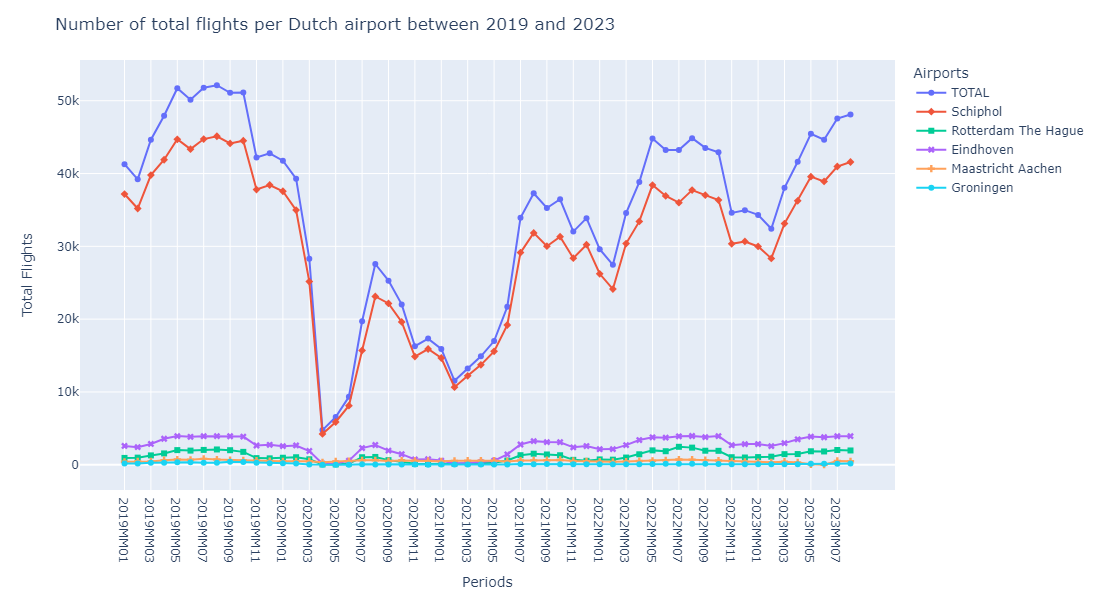

In [8]:
data_total = data.loc[data['Periods'].str.contains('2019MM|2020MM|2021MM|2022MM|2023MM', case=False, regex=True)]

print(f'Dataframe shape: {data_total.shape}')

figtotal = px.line(data_total, 
                x = "Periods", 
                y = "Total Flights",
                color = "Airports",
                symbol = "Airports",
                # log_y=True
                )

figtotal.update_layout(
                title={'text': 'Number of total flights per Dutch airport between 2019 and 2023'},
                height=600,
                # showlegend=False
                )

figtotal.show()

The figure above is a visual representation of the number of total flights from Dutch airports between 2019 and 2023. The graph shows the five Dutch airports and the total flights. The same pattern is seen for all the airports. As stated earlier, a big decline in the number of flights is seen in 2020. In the years before the pandemic the number of flights were higher than we see in the years after the pandemic. In the summer of 2020 the number of flights were increasing a little bit, but after the summer a lot of new COVID-19 infections were detected and new restrictions caused a new drop in the number of flights. The summer of 2021 is the start of a fluctuating increase in the number of flights. But as the graph shows, the number of flights is still less than before the pandemic. 

In [9]:
data_mail = data.loc[data['Periods'].str.contains('2019MM|2020MM|2021MM|2022MM|2023MM', case=False, regex=True)]
data_mail = data_mail[data_mail['Airports'] == 'Schiphol']

print(f'Dataframe shape: {data_mail.shape}')

figmail = px.line(data_mail, 
                x = "Periods", 
                y = ["Total Unloaded Mail [tons]", "Total Loaded Mail [tons]"],
                labels = {
                    "Periods": "Period",
                    "value": "Amount of mail in [tons]",
                    "variable": "Type of mail"
                    },
                log_y = True,
                )

figmail.update_layout(
                title={'text': 'Total amount of (un)loaded mail [tons] at Schiphol between 2019 and 2023'},
                height=600,
                )

figmail.update_yaxes(categoryorder = 'category ascending')

figmail.show()

Dataframe shape: (56, 105)


The figure above is a visual representation of the amount of mail at the Dutch airports. As can be seen, most of the mail is sent via Schiphol, since this is the biggest airport of the Netherlands. Also Groningen takes part in the transportation of mail. In the graph above, the same decline is seen as in the graph for passenger transport. By the start of the COVID-19 pandemic in march 2020, the amount of transported mail dropped to almost zero. This can be explained because a lot of mail is transported with the passenger flights. Since the passenger flights dropped in march 2020, the same happened to the mail. However, a fast increase is seen in the months after. But at the end of 2020 a new decline is seen, which does not stop. We can conclude from this graph that there needs to be another factor which influences the amount of transported mail, besides the COVID-19 infections. 

Dataframe shape: (336, 105)


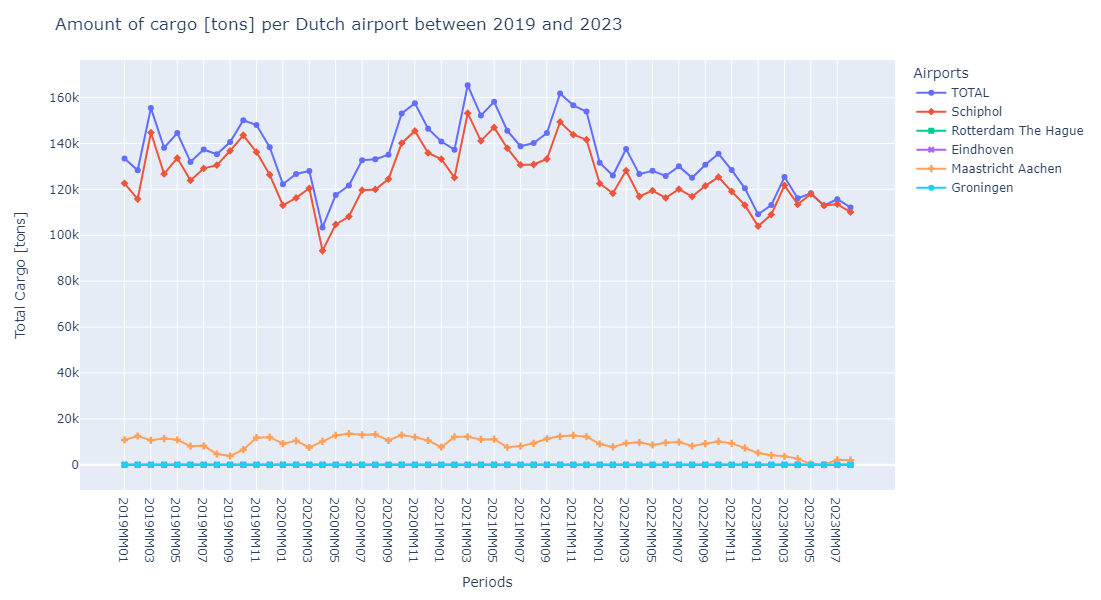

In [10]:
data_cargo = data.loc[data['Periods'].str.contains('2019MM|2020MM|2021MM|2022MM|2023MM', case=False, regex=True)]

print(f'Dataframe shape: {data_cargo.shape}')

figcargo = px.line(data_cargo, 
                x = "Periods", 
                y = "Total Cargo [tons]",
                color = "Airports",
                symbol = "Airports",
                # log_y=True
                )

figcargo.update_layout(
                title={'text': 'Amount of cargo [tons] per Dutch airport between 2019 and 2023'},
                height=600,
                )

figcargo.show()

The figure above shows the amount of cargo transported per Dutch airport. In contrast to the passengers and amount of mail in the previous graphs, the decline in cargo is less big at the start of the COVID-19 pandemic. This can be explained since cargo flights are separate from passenger flights, so less interaction between people is needed. This means a smaller chance of COVID-19 infection. Besides this, cargo is very essential, also when there is a pandemic. It is not possible to stop the transportation of goods, like food and medical stuff, so the amount of cargo will not decrease as much as for example passengers and mail. 

In [11]:
data_total = data.loc[data['Periods'].str.contains('2019MM|2020MM|2021MM|2022MM|2023MM', case=False, regex=True)]
data_total2 = data_total.iloc[:, [1, 2, 5, 14, 45, 76]]
data_total2 = data_total2.groupby('Airports').get_group('TOTAL')
# data_total2 = data_total2.groupby('Airports').get_group('Schiphol')
# data_total2 = data_total2.groupby('Airports').get_group('Rotterdam The Hague')
# data_total2 = data_total2.groupby('Airports').get_group('Eindhoven')
# data_total2 = data_total2.groupby('Airports').get_group('Maastricht Aachen')
# data_total2 = data_total2.groupby('Airports').get_group('Groningen')

data_total2['Total Flights'] = pd.to_numeric(data_total2['Total Flights'], errors='coerce')
data_total2['Total Passengers'] = pd.to_numeric(data_total2['Total Passengers'], errors='coerce')
data_total2['Total Cargo [tons]'] = pd.to_numeric(data_total2['Total Cargo [tons]'], errors='coerce')
data_total2['Total Mail [tons]'] = pd.to_numeric(data_total2['Total Mail [tons]'], errors='coerce')

figtotal2 = px.line(data_total2, 
                x = 'Periods', 
                y = ["Total Flights", "Total Passengers", "Total Cargo [tons]", "Total Mail [tons]"],
                color = "variable",
                symbol = "variable",
                log_y = True,
                labels = {
                    "Periods": "Period",
                    "value": "Amount in [flights], [pax] or [tons]",
                    "variable": "Type of movement"
                    }
                )

figtotal2.update_layout(
                title={'text': 'Total amount of movements for all Dutch airports between 2019 and 2023'},
                height=800
                )

figtotal2.show()



This figure shows all the movements from Dutch airports. This shows again that COVID-19 had the biggest effect on passenger flights and mail. There was a small effect on cargo flights, but as can be seen in the graph there are more often these small changes in the quantity of cargo. 

In [13]:
covidfile_path = 'COVID_19_aantallen_gemeente_cumulatief.csv'

coviddata = pd.read_csv(covidfile_path, delimiter=';')

end_of_months = '2020-03-31|2020-04-30|2020-05-31|2020-06-30|2020-07-31|2020-08-31|2020-09-30|2020-10-31|2020-11-30|2020-12-31|2021-01-31|2021-02-28|\
                 2021-03-31|2021-04-30|2021-05-31|2021-06-30|2021-07-31|2021-08-31|2021-09-30|2021-10-31|2021-11-30|2021-12-31|2022-01-31|2022-02-28|\
                 2022-03-31|2022-04-30|2022-05-31|2022-06-30|2022-07-31|2022-08-31|2022-09-30|2022-10-31|2022-11-30|2022-12-31|2023-01-31|2023-02-28|\
                 2023-03-31|2023-04-30|2023-05-31|2023-06-30|2023-07-31|2023-08-31'

coviddf = coviddata[coviddata['Date_of_publication'].str.contains(end_of_months)==True]

coviddf = coviddf.drop(['Version', 'Date_of_report', 'Municipality_code',
       'Municipality_name', 'Hospital_admission',
       'Deceased'], axis=1)

coviddf = coviddf.reset_index()

for i in range(len(coviddf)):
    date_list = coviddf['Date_of_publication'][i].rstrip('10:00:00').split('-')
    new_date = date_list[0] + 'MM' + date_list[1]
    coviddf.loc[i, 'Date_of_publication'] = new_date

sum = 0
date = coviddf['Date_of_publication'][0]
cumulative_per_date = {}
cumulative = 0
sum_last_month = 0

for i in range(len(coviddf)):
    if coviddf['Date_of_publication'][i] == date:
        sum += coviddf['Total_reported'][i]
    else:
        sum -= cumulative
        cumulative += sum
        cumulative_per_date.update({date: sum})
        date = coviddf['Date_of_publication'][i]
        last_sum = sum
        sum = 0

fig3 = px.bar(x= cumulative_per_date.keys(),
              y = cumulative_per_date.values(),
              title = 'Amount of reported covid cases per month in the Netherlands',
              color_discrete_sequence =['orange']*len(cumulative_per_date),
            #   opacity = 0.5
            )
fig3.update_xaxes(tickangle=90, title = 'Month, Year')
fig3.update_yaxes(title = 'Reported covid cases')
# fig3.update_layout(autosize = False, width = 800, height = 600)

fig3.show()

In [14]:
for trace in fig3.data:
    figtotal2.add_trace(trace)


figtotal2.update_layout(
    title = {'text': 'Plot of the covid data combined with the flights'},
    height = 800,  # Adjust the height to your preference
    # showlegend = True
)

figtotal2.show()

In the graph above, the number of COVID-19 infections and the number of flights are shown together in one graph. It can be seen that in the beginning of the pandemic, the number of flights decreased as a result of the COVID-19 infections. However, after a while the number of flights only slightly changed when the number of infections increased. This was the moment that we learned how to handle COVID-19.

References
(1) https://www.kimnet.nl/binaries/kimnet/documenten/papers/2022/11/09/vliegen-na-corona-de-vliegintentie-en-houding-ten-opzichte-van-de-luchtvaart-van-nederlanders-na-twee-jaar-covid-19/Zijlstra+en+Uitbeijerse+%282022%29+Vliegen+na+corona+-+CVS-paper_def.pdf
(2) file:///C:/Users/charl/Downloads/Graduation_thesis_Sicong_Ouyang.pdf
(3) Dataset flights
(4) Dataset COVID-19 infections